# Jonathan Halverson
# Monday, March 27, 2017
# Part 13: Simple predictive models including Experience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')
from scipy.stats import binom

In [2]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


We remove no contests immediately to avoid inf (infinity) in WinRatio:

In [3]:
fights = fights[fights.Outcome != 'no contest']

In [4]:
num = []
num_wins = []
num_L = []
num_wins_L = []
for index, row in fights.iterrows():
     d = row['Date']
     
     winner = row['Winner']
     x = fights[((fights.Winner == winner) | (fights.Loser == winner)) & (fights.Date < d) & (fights.Outcome != 'no contest')].shape[0]
     y = fights[(fights.Winner == winner) & (fights.Date < d)].shape[0]
     num.append(x)
     num_wins.append(y)
     
     loser = row['Loser']
     x = fights[((fights.Winner == loser) | (fights.Loser == loser)) & (fights.Date < d) & (fights.Outcome != 'no contest')].shape[0]
     y = fights[(fights.Winner == loser) & (fights.Date < d)].shape[0]
     num_L.append(x)
     num_wins_L.append(y)
fights['Num'] = num
fights['Num_L'] = num_L
fights['Num_Wins'] = num_wins
fights['Num_Wins_L'] = num_wins_L
fights['WinRatio'] = fights.Num_Wins / fights.Num
fights['WinRatio_L'] = fights.Num_Wins_L / fights.Num_L
len(num), len(num_L), max(num), max(num_L), min(num), min(num_L)

(4026, 4026, 26, 26, 0, 0)

In [5]:
x = 'Gray Maynard'
fights[(fights.Winner == x) & (fights.Winner == x)]

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Num,Num_L,Num_Wins,Num_Wins_L,WinRatio,WinRatio_L
322,Gray Maynard,def.,Fernando Bruno,Featherweight,U-DEC,NaN,3,5:00,The Ultimate Fighter 23 Finale,2016-07-08,"Las Vegas, Nevada, USA",15,1,9,0,0.6,0.000000
2075,Gray Maynard,def.,Clay Guida,Lightweight,S-DEC,NaN,5,5:00,UFC on FX: Maynard vs Guida,2012-06-22,"Atlantic City, New Jersey, USA",10,15,8,9,0.8,0.600000
2630,Gray Maynard,def.,Kenny Florian,Lightweight,U-DEC,NaN,3,5:00,UFC 118: Edgar vs Penn 2,2010-08-28,"Boston, Massachusetts, USA",7,14,7,11,1.0,0.785714
2774,Gray Maynard,def.,Nate Diaz,Lightweight,S-DEC,NaN,3,5:00,UFC Fight Night: Maynard vs Diaz,2010-01-11,"Fairfax, Virginia, USA",6,8,6,6,1.0,0.750000
2862,Gray Maynard,def.,Roger Huerta,Lightweight,S-DEC,NaN,3,5:00,UFC Fight Night: Diaz vs Guillard,2009-09-16,"Oklahoma City, Oklahoma, USA",5,7,5,6,1.0,0.857143
2964,Gray Maynard,def.,Jim Miller,Lightweight,U-DEC,NaN,3,5:00,UFC 96: Jackson vs Jardine,2009-03-07,"Columbus, Ohio, USA",4,2,4,2,1.0,1.000000
3051,Gray Maynard,def.,Rich Clementi,Lightweight,U-DEC,NaN,3,5:00,UFC 90: Silva vs Cote,2008-10-25,"Rosemont, Illinois, USA",3,8,3,5,1.0,0.625000
3163,Gray Maynard,def.,Frankie Edgar,Lightweight,U-DEC,NaN,3,5:00,UFC Fight Night: Florian vs Lauzon,2008-04-02,"Broomfield, Colorado, USA",2,3,2,3,1.0,1.000000
3198,Gray Maynard,def.,Dennis Siver,Lightweight,U-DEC,NaN,3,5:00,UFC Fight Night: Swick vs Burkman,2008-01-23,"Las Vegas, Nevada, USA",1,2,1,1,1.0,0.500000
3263,Gray Maynard,def.,Joe Veres,Lightweight,KO/TKO,Punch,1,0:09,UFC Fight Night: Thomas vs Florian,2007-09-19,"Las Vegas, Nevada, USA",0,0,0,0,NaN,NaN


In [6]:
fights[fights.WinRatio_L > 1][['Winner', 'WinRatio']]

,Winner,WinRatio


In [7]:
fights.describe()

,Round,Num,Num_L,Num_Wins,Num_Wins_L,WinRatio,WinRatio_L
count,4026.000000,4026.000000,4026.000000,4026.000000,4026.000000,3291.000000,3074.000000
mean,2.247144,4.426478,4.103577,2.954049,2.608793,0.633479,0.592959
std,1.010392,4.612937,4.784857,3.301741,3.299571,0.296247,0.307353
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.500000
50%,3.000000,3.000000,2.000000,2.000000,1.000000,0.666667,0.625000
75%,3.000000,7.000000,6.000000,4.000000,4.000000,0.833333,0.800000
max,5.000000,26.000000,26.000000,19.000000,19.000000,1.000000,1.000000


### Note that win ratio can be NaN

In [8]:
fights.WinRatio.loc[10:20]

10    0.750000
11    0.666667
12    0.833333
13         NaN
14         NaN
15    0.666667
16    0.500000
17    0.714286
18         NaN
19    0.750000
20    1.000000
Name: WinRatio, dtype: float64

In [9]:
iofile = 'data/ufc_name_education.csv'
ufc = pd.read_csv(iofile, header=0)
ufc.head(3)

,Name,Education
0,Jim Alers,1
1,Corey Anderson,1
2,Rich Attonito,1


In [10]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df = df.drop(['Name', 'Name_L'], axis=1)
df = df.merge(ufc, left_on='Winner', right_on='Name', how='left')
df = df.merge(ufc, left_on='Loser', right_on='Name', how='left', suffixes=('', '_L'))
df.Education = df.Education.fillna(0.0)
df.Education_L = df.Education_L.fillna(0.0)
df = df.drop(['Name', 'Name_L'], axis=1)
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,LegReach,Stance,Dob,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Education,Education_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,41.0,Orthodox,1984-04-24,68.0,69.0,38.0,Southpaw,1981-10-17,0.0,0.0
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,42.0,Southpaw,1975-04-14,73.0,77.0,43.0,Southpaw,1984-01-04,0.0,1.0
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,41.0,Orthodox,1979-12-07,72.0,74.0,42.0,Orthodox,1981-01-28,0.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4026 entries, 0 to 4025
Data columns (total 29 columns):
Winner         4026 non-null object
Outcome        4026 non-null object
Loser          4026 non-null object
WeightClass    4026 non-null object
Method         4026 non-null object
MethodNotes    2154 non-null object
Round          4026 non-null int64
Time           4026 non-null object
Event          4026 non-null object
Date           4026 non-null datetime64[ns]
Location       4026 non-null object
Num            4026 non-null int64
Num_L          4026 non-null int64
Num_Wins       4026 non-null int64
Num_Wins_L     4026 non-null int64
WinRatio       3291 non-null float64
WinRatio_L     3074 non-null float64
Height         4022 non-null float64
Reach          3762 non-null float64
LegReach       2294 non-null float64
Stance         3905 non-null object
Dob            3970 non-null datetime64[ns]
Height_L       4006 non-null float64
Reach_L        3436 non-null float64
LegReach_L 

Filter fights to defeats since January 1, 2005:

In [12]:
fs = df[(df.Date > pd.to_datetime('2005-01-01')) & (df.Outcome == 'def.')].copy()
fs.shape[0]

3561

### Younger wins

In [13]:
yw = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & (fs.Dob != fs.Dob_L)]
wins = yw[yw.Dob > yw.Dob_L].shape[0]
total = yw.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1964, 3529, 0.5565315953527912, 32, 1.9906913544237038e-11)

### Longer reach wins

In [14]:
lr = fs[pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L) & (fs.Reach != fs.Reach_L)]
wins = lr[lr.Reach > lr.Reach_L].shape[0]
total = lr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1499, 2863, 0.5235766678309466, 698, 0.012254511782245889)

What if we don't exclude nulls?

In [15]:
lr = fs[fs.Reach != fs.Reach_L]
wins = lr[lr.Reach > lr.Reach_L].shape[0]
total = lr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total

(1499, 3138, 0.47769279796048436, 423)

In [16]:
71.0 > np.nan

False

In [17]:
71.0 == np.nan

False

In [18]:
lr[['Reach', 'Reach_L']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3580
Data columns (total 2 columns):
Reach      3115 non-null float64
Reach_L    2877 non-null float64
dtypes: float64(2)
memory usage: 73.5 KB


We see that nulls in Reach_L lead to Falses which increased the total which gave a win ratio less than 1/2.

### Taller wins

In [19]:
ht = fs[pd.notnull(fs.Height) & pd.notnull(fs.Height_L) & (fs.Height != fs.Height_L)]
wins = ht[ht.Height > ht.Height_L].shape[0]
total = ht.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1486, 2903, 0.511884257664485, 658, 0.20691383522689766)

### Stance

In [20]:
st = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & (((fs.Stance == 'Orthodox') & (fs.Stance_L == 'Southpaw')) | ((fs.Stance == 'Southpaw') & (fs.Stance_L == 'Orthodox')))]
wins = st[st.Stance == 'Southpaw'].shape[0]
total = st.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(561, 1010, 0.5554455445544555, 2551, 0.00047237811629372023)

### Education

In [21]:
ed = fs[pd.notnull(fs.Education) & pd.notnull(fs.Education_L) & (fs.Education != fs.Education_L)]
wins = ed[ed.Education == 1].shape[0]
total = ed.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(594, 1051, 0.5651760228353948, 2510, 2.6619836969235326e-05)

### Leg reach

In [22]:
lg = fs[pd.notnull(fs.LegReach) & pd.notnull(fs.LegReach_L) & (fs.LegReach != fs.LegReach_L)]
wins = lg[lg.LegReach > lg.LegReach_L].shape[0]
total = lg.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(487, 993, 0.4904330312185297, 2568, 0.56787738449981351)

### Predict winner has more UFC fights

In [23]:
nf = fs[pd.notnull(fs.Num) & pd.notnull(fs.Num_L) & (fs.Num != fs.Num_L)]
wins = nf[nf.Num > nf.Num_L].shape[0]
total = nf.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1606, 2886, 0.5564795564795565, 675, 1.3957729165251447e-09)

### Predict winner has higher win ratio (for 5 fights or more)

In [24]:
wr = fs[pd.notnull(fs.WinRatio) & pd.notnull(fs.WinRatio_L) & (fs.WinRatio != fs.WinRatio_L) & (fs.Num > 4) & (fs.Num_L > 4)]
wins = wr[wr.WinRatio > wr.WinRatio_L].shape[0]
total = wr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(439, 737, 0.5956580732700135, 2824, 2.3149181853620525e-07)

In [25]:
# How does the result change if we replace NaN with 0.5 and don't require a certain number of fights?
# Ans: (1571, 2728, 0.5758797653958945, 833, 2.331962646952389e-15)
#fs.WinRatio = fs.WinRatio.fillna(0.5)
#fs.WinRatio_L = fs.WinRatio_L.fillna(0.5)

### Higher win ratio and younger

In [26]:
vd = fs[pd.notnull(fs.WinRatio) & pd.notnull(fs.WinRatio_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & (fs.WinRatio != fs.WinRatio_L) & (fs.Dob != fs.Dob_L) & (fs.Num > 4) & (fs.Num_L > 4)]
msk1 = (vd.WinRatio > vd.WinRatio_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.WinRatio < vd.WinRatio_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.WinRatio > sp.WinRatio_L].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(256, 407, 0.628992628992629, 3154, 2.1864763337164381e-07)

### Reach advantage of 4 inches or more

In [27]:
vd = fs[pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = np.abs(vd.Reach - vd.Reach_L) >= 4

sp = vd[msk1]
wins = sp[(sp.Reach > sp.Reach_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(523, 942, 0.5552016985138004, 2619, 0.00078230416432338058)

In [28]:
sp[['Winner', 'Reach', 'Loser', 'Reach_L']].head(10)

,Winner,Reach,Loser,Reach_L
5,Belal Muhammad,72.0,Randy Brown,78.0
6,Wilson Reis,65.0,Ulka Sasaki,71.0
10,Chan Sung Jung,72.0,Dennis Bermudez,66.0
12,James Vick,76.0,Abel Trujillo,70.0
13,Volkan Oezdemir,75.0,Ovince Saint Preux,80.0
16,Curtis Blaydes,80.0,Adam Milstead,76.0
17,Chas Skelly,72.0,Chris Gruetzemacher,68.0
18,Ricardo Ramos,72.0,Michinori Tanaka,67.0
19,Tecia Torres,60.0,Bec Rawlings,64.0
20,Niko Price,76.0,Alex Morono,72.0


### 4 years or more younger

In [29]:
vd = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L)]
msk1 = ((vd.Dob - vd.Dob_L) / np.timedelta64(1, 'Y'))**2 >= 16

sp = vd[msk1]
wins = sp[(sp.Dob > sp.Dob_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(893, 1511, 0.5909993381866314, 2050, 1.5717573327498843e-12)

In [30]:
sp[['Winner', 'Dob', 'Loser', 'Dob_L']].head(20)

,Winner,Dob,Loser,Dob_L
1,Anderson Silva,1975-04-14,Derek Brunson,1984-01-04
3,Glover Teixeira,1979-10-28,Jared Cannonier,1984-03-16
4,Dustin Poirier,1989-01-19,Jim Miller,1983-08-30
6,Wilson Reis,1985-01-06,Ulka Sasaki,1989-10-07
7,Islam Makhachev,1991-10-27,Nik Lentz,1984-08-13
8,Rick Glenn,1989-04-12,Phillipe Nover,1984-02-03
9,Ryan LaFlare,1983-10-01,Roan Carneiro,1978-06-02
11,Felice Herrig,1984-09-18,Alexa Grasso,1993-08-09
13,Volkan Oezdemir,1989-09-19,Ovince Saint Preux,1983-04-08
14,Marcel Fortuna,1985-10-22,Anthony Hamilton,1980-04-14


### Younger and greater reach

In [31]:
vd = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = (vd.Reach > vd.Reach_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.Reach < vd.Reach_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[(sp.Dob > sp.Dob_L) & (sp.Reach > sp.Reach_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(919, 1607, 0.5718730553827007, 1954, 9.082436176617217e-09)

### Southpaw and younger

In [32]:
vd = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L)]
msk1 = (vd.Stance == 'Southpaw') & (vd.Stance_L == 'Orthodox') & (vd.Dob > vd.Dob_L)
msk2 = (vd.Stance == 'Orthodox') & (vd.Stance_L == 'Southpaw') & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.Stance == 'Southpaw'].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(284, 460, 0.6173913043478261, 3101, 5.4168911673341359e-07)

### South, younger and greater reach

In [33]:
vd = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = (vd.Stance == 'Southpaw') & (vd.Stance_L == 'Orthodox') & (vd.Reach > vd.Reach_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.Stance == 'Orthodox') & (vd.Stance_L == 'Southpaw') & (vd.Reach < vd.Reach_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.Stance == 'Southpaw'].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(132, 213, 0.6197183098591549, 3348, 0.00058036677808886463)

In [34]:
sp[['Winner', 'Dob', 'Reach', 'Stance', 'Loser', 'Dob_L', 'Reach_L', 'Stance_L']].head()

,Winner,Dob,Reach,Stance,Loser,Dob_L,Reach_L,Stance_L
26,Sam Alvey,1986-05-06,75.0,Southpaw,Nate Marquardt,1979-04-20,74.0,Orthodox
33,Jason Gonzalez,1990-02-28,74.0,Southpaw,JC Cottrell,1989-11-04,71.0,Orthodox
67,Sultan Aliev,1984-09-17,74.0,Orthodox,Bojan Velickovic,1988-12-18,76.0,Southpaw
91,Juliana Lima,1982-03-15,65.0,Orthodox,JJ Aldrich,1992-09-29,67.0,Southpaw
92,Demetrious Johnson,1986-08-13,64.0,Orthodox,Tim Elliott,1986-12-24,65.0,Southpaw


### Overall win ratio

In [35]:
fs_fighters = fs.Winner.append(fs.Loser).value_counts().to_frame()
wins = fs.Winner.value_counts().to_frame()
loses = fs.Loser.value_counts().to_frame()
fs_fighters = fs_fighters.merge(wins, left_index=True, right_index=True, how='left')
fs_fighters = fs_fighters.merge(loses, left_index=True, right_index=True, how='left')
fs_fighters = fs_fighters.fillna(0.0)
fs_fighters.columns = ['Total', 'Wins', 'Losses']
fs_fighters['WinRatio'] = fs_fighters.Wins / (fs_fighters.Wins + fs_fighters.Losses)

In [36]:
ws = fs.merge(fs_fighters[['Total', 'WinRatio']], left_on='Winner', right_index=True, how='left')
ws = ws.merge(fs_fighters[['Total', 'WinRatio']], left_on='Loser', right_index=True, how='left', suffixes=('', '_L'))
ws.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Reach_L,LegReach_L,Stance_L,Dob_L,Education,Education_L,Total,WinRatio_y,Total_L,WinRatio
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,69.0,38.0,Southpaw,1981-10-17,0.0,0.0,5,0.800000,6,0.50000
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,77.0,43.0,Southpaw,1984-01-04,0.0,1.0,21,0.809524,10,0.70000
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,74.0,42.0,Orthodox,1981-01-28,0.0,1.0,8,0.875000,21,0.52381


In [37]:
ws = ws[pd.notnull(ws.WinRatio) & pd.notnull(ws.WinRatio_L) & (ws.Total > 5) & (ws.Total_L > 5)]
wins = ws[ws.WinRatio > ws.WinRatio_L].shape[0]
total = ws.shape[0]
wins, total, wins / float(total), ws.shape[0] - total

(147, 1577, 0.0932149651236525, 0)

# Part II: Decision trees

In [38]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3580
Data columns (total 29 columns):
Winner         3561 non-null object
Outcome        3561 non-null object
Loser          3561 non-null object
WeightClass    3561 non-null object
Method         3561 non-null object
MethodNotes    1860 non-null object
Round          3561 non-null int64
Time           3561 non-null object
Event          3561 non-null object
Date           3561 non-null datetime64[ns]
Location       3561 non-null object
Num            3561 non-null int64
Num_L          3561 non-null int64
Num_Wins       3561 non-null int64
Num_Wins_L     3561 non-null int64
WinRatio       2992 non-null float64
WinRatio_L     2829 non-null float64
Height         3561 non-null float64
Reach          3538 non-null float64
LegReach       2242 non-null float64
Stance         3454 non-null object
Dob            3559 non-null datetime64[ns]
Height_L       3560 non-null float64
Reach_L        3300 non-null float64
LegReach_L 

In [39]:
fs['Age'] = (fs.Date - fs.Dob) / np.timedelta64(1, 'Y')
fs['Age_L'] = (fs.Date - fs.Dob_L) / np.timedelta64(1, 'Y')

In [40]:
fs.Stance.value_counts()

Orthodox       2620
Southpaw        751
Switch           70
Open Stance      13
Name: Stance, dtype: int64

In [41]:
fs.Stance_L.value_counts()

Orthodox       2704
Southpaw        636
Switch           79
Open Stance       9
Sideways          1
Name: Stance_L, dtype: int64

In [42]:
gs = fs[fs.Stance.isin(['Southpaw', 'Orthodox']) & fs.Stance_L.isin(['Southpaw', 'Orthodox'])].copy()

Replace NaN's in win ratios:

In [43]:
gs.WinRatio = gs.WinRatio.fillna(0.5)
gs.WinRatio_L = gs.WinRatio_L.fillna(0.5)

In [44]:
gs.Stance = gs.Stance.replace({'Southpaw':1, 'Orthodox':0})
gs.Stance_L = gs.Stance_L.replace({'Southpaw':1, 'Orthodox':0})

In [45]:
#gs.LegReach = gs.LegReach.apply()

In [46]:
cols = ['Reach', 'Height', 'LegReach', 'Stance', 'Num', 'WinRatio', 'Education', 'Age', 'Reach_L', 'Height_L', 'LegReach_L', 'Stance_L', 'Num_L', 'WinRatio_L', 'Education_L', 'Age_L']
cols = ['Reach', 'Height', 'Stance', 'Num', 'WinRatio', 'Education', 'Age', 'Reach_L', 'Height_L', 'Stance_L', 'Num_L', 'WinRatio_L', 'Education_L', 'Age_L']

gs[cols].head()

,Reach,Height,Stance,Num,WinRatio,Education,Age,Reach_L,Height_L,Stance_L,Num_L,WinRatio_L,Education_L,Age_L
0,71.0,69.0,0,4,0.750000,0.0,32.802864,69.0,68.0,1,5,0.600000,0.0,35.321738
1,77.0,74.0,1,20,0.800000,0.0,41.832481,77.0,73.0,1,9,0.777778,1.0,33.106772
2,72.0,73.0,0,7,0.857143,0.0,37.183515,74.0,72.0,0,20,0.550000,1.0,36.039070
4,72.0,69.0,1,16,0.750000,0.0,28.063547,71.0,68.0,1,24,0.708333,0.0,33.454486
5,72.0,71.0,0,3,0.333333,0.0,28.594701,78.0,75.0,0,4,0.750000,0.0,26.598767


In [47]:
gs = gs[cols]
gs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3580
Data columns (total 14 columns):
Reach          3170 non-null float64
Height         3190 non-null float64
Stance         3190 non-null int64
Num            3190 non-null int64
WinRatio       3190 non-null float64
Education      3190 non-null float64
Age            3188 non-null float64
Reach_L        2958 non-null float64
Height_L       3190 non-null float64
Stance_L       3190 non-null int64
Num_L          3190 non-null int64
WinRatio_L     3190 non-null float64
Education_L    3190 non-null float64
Age_L          3164 non-null float64
dtypes: float64(10), int64(4)
memory usage: 373.8 KB


In [48]:
gs.describe()

,Reach,Height,Stance,Num,WinRatio,Education,Age,Reach_L,Height_L,Stance_L,Num_L,WinRatio_L,Education_L,Age_L
count,3170.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3188.000000,2958.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3164.000000
mean,72.606467,70.765517,0.223824,4.828527,0.612572,0.210345,29.346474,72.296146,70.651097,0.188715,4.561129,0.571296,0.174295,30.084203
std,3.967516,3.312065,0.416871,4.732056,0.271384,0.407617,3.931837,3.780616,3.173793,0.391343,4.960413,0.272502,0.379422,4.062268
min,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,19.589725,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,18.541106
25%,70.000000,69.000000,0.000000,1.000000,0.500000,0.000000,26.543324,70.000000,68.000000,0.000000,1.000000,0.500000,0.000000,27.138819
50%,73.000000,71.000000,0.000000,3.000000,0.615385,0.000000,29.171030,72.000000,71.000000,0.000000,3.000000,0.500000,0.000000,29.889731
75%,75.000000,73.000000,0.000000,7.000000,0.777778,0.000000,31.878820,75.000000,73.000000,0.000000,7.000000,0.750000,0.000000,32.724149
max,85.000000,84.000000,1.000000,26.000000,1.000000,1.000000,47.185089,85.000000,84.000000,1.000000,26.000000,1.000000,1.000000,47.855877


In [49]:
shuffled = []
from random import random as rng
for index, row in gs.iterrows():
     if (rng() < 0.5):
          shuffled.append(([1] + list(row[7:].values) + list(row[:7].values)))
     else:
          shuffled.append(([0] + list(row.values)))

In [50]:
data = pd.DataFrame(shuffled).dropna()
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,0.506463,72.376190,70.621769,0.206122,4.887755,0.601603,0.193197,29.709274,72.481463,70.720408,0.216667,5.053061,0.605727,0.203741,29.896669
std,0.500043,3.826513,3.211995,0.404588,4.806390,0.270537,0.394874,4.002587,3.964423,3.334896,0.412044,5.007844,0.267201,0.402847,4.027875
min,0.000000,60.000000,61.000000,0.000000,0.000000,0.000000,0.000000,18.541106,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,19.589725
25%,0.000000,70.000000,68.000000,0.000000,1.000000,0.500000,0.000000,26.826013,70.000000,69.000000,0.000000,1.000000,0.500000,0.000000,27.083376
50%,1.000000,72.000000,71.000000,0.000000,3.000000,0.600000,0.000000,29.529696,73.000000,71.000000,0.000000,3.000000,0.600000,0.000000,29.730932
75%,1.000000,75.000000,73.000000,0.000000,7.000000,0.750000,0.000000,32.349056,75.000000,73.000000,0.000000,7.000000,0.764706,0.000000,32.445567
max,1.000000,84.000000,84.000000,1.000000,26.000000,1.000000,1.000000,47.185089,85.000000,84.000000,1.000000,26.000000,1.000000,1.000000,47.855877


In [51]:
cols = [0, 3, 7, 10, 14]
cols = [0, 7, 14]
data = data.loc[:,cols]
data

,0,7,14
0,0,32.802864,35.321738
1,1,33.106772,41.832481
2,1,36.039070,37.183515
3,0,28.063547,33.454486
4,1,26.598767,28.594701
5,1,27.348953,32.099222
6,1,32.498956,25.295523
7,0,27.836301,33.024634
8,1,38.697578,33.366873
9,0,29.889731,30.147094


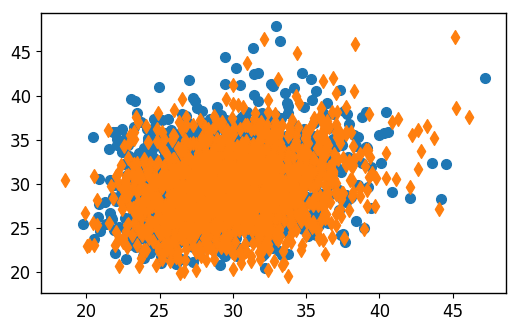

In [83]:
plt.scatter(data[data.loc[:,0]==0].iloc[:,1], data[data.loc[:,0]==0].iloc[:,2])
plt.scatter(data[data.loc[:,0]==1].iloc[:,1], data[data.loc[:,0]==1].iloc[:,2], marker='d')

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:].values, data.iloc[:,0].values, test_size=0.3)

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [76]:
from sklearn.metrics import accuracy_score

dtree = dtree.fit(X_train, y_train)
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print accuracy_score(y_train_pred, y_train), accuracy_score(y_test_pred, y_test)

0.562196307094 0.555555555556


In [72]:
from sklearn import tree
tree.export_graphviz(dtree, out_file='tree.dot')

In [55]:
dtree.feature_importances_

array([ 0.49070198,  0.50929802])

In [56]:
dtree.n_features_

2

In [57]:
dtree.n_classes_

2

In [58]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=dtree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False)

In [59]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
print accuracy_score(y_train_pred, y_train), accuracy_score(y_test_pred, y_test)

1.0 0.521541950113


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, criterion='entropy')
rf = rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print accuracy_score(y_train_pred, y_train), accuracy_score(y_test_pred, y_test)

1.0 0.514739229025
